In [505]:
import pandas as pd
from prototypes.datamodel import Publishers, Lang
from pandas.api.types import CategoricalDtype

war_df = pd.read_csv('../data/processed/war-ukraine-extended-ordered.csv',
                     index_col=[0])

publisher_dtype = CategoricalDtype(
    categories=[Publishers.KATHIMERINI.value,
                Publishers.EFSYN.value,
                Publishers.NAFTEMPORIKI.value,
                Publishers.THE_GUARDIAN.value
                ],
    ordered=True)
lang_enum = CategoricalDtype(
    categories=[Lang.GREEK.value,
                Lang.ENGLISH.value
                ],
    ordered=True)

war_df['Publisher'] = war_df['Publisher'].astype(publisher_dtype)
war_df['Lang'] = war_df['Lang'].astype(lang_enum)
war_df['Tag'] = war_df['Tag'].astype('category')
war_df['Text'] = war_df['Text'].fillna('').astype('string')
war_df['Comments api key'] = war_df['Comments api key'].fillna('').astype('string')
war_df['Comments count'] = war_df['Comments count'].astype('int32')
war_df['Heading'] = war_df['Heading'].astype('string')
war_df['Date Formatted'] = pd.to_datetime(war_df['Date Formatted'], format="%d-%m-%Y")
war_df['Year'] = pd.DatetimeIndex(war_df['Date Formatted']).year
war_df['Month'] = pd.DatetimeIndex(war_df['Date Formatted']).month
war_df['Day'] = pd.DatetimeIndex(war_df['Date Formatted']).day
war_df.dtypes

Publisher                 category
Date Formatted      datetime64[ns]
Lang                      category
Heading                     string
Tag                       category
Text                        string
Comments exist                bool
Comments count               int32
Comments api key            string
Article url                 object
Chars                        int64
Words                        int64
Year                         int64
Month                        int64
Day                          int64
dtype: object

# Tokens
## Strip Punctuation from 'Text' string before the tokenization process

In [506]:
import string
import re
def removePunctuation(text):
    text = re.sub(r'['+string.punctuation + '’—”'+']', "", text.lower())
    return re.sub(r'\W', ' ', text)

war_df['Tokens'] = war_df['Text'].map(lambda x: removePunctuation(x))

In [294]:
war_df.head()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Tokens
0,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,,https://www.kathimerini.gr/world/561942142/mpo...,4114,627,2022,7,5,οι κυρώσεις που έχουν επιβληθεί στην ρωσία σε ...
1,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,,https://www.kathimerini.gr/world/561942133/mar...,2548,360,2022,7,5,οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...
2,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,,https://www.kathimerini.gr/economy/internation...,1848,274,2022,7,5,ο εμπορικός τζίρος μεταξύ τουρκίας και ρωσίας ...
3,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,,https://www.kathimerini.gr/politics/561941488/...,2472,371,2022,7,5,το απαραβίαστο των συνόρων είναι η βάση της σ...
4,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,,https://www.kathimerini.gr/world/561941377/oyk...,2829,418,2022,7,5,ο μεγαλύτερος πυρηνικός σταθμός της ευρώπης με...


In [295]:
war_df.tail()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Tokens
13731,THE GUARDIAN,2022-07-02,en,Russia-Ukraine war: what we know on day 129 of...,WORLD,Powerful explosions shook Ukraine’s southern c...,False,0,,https://www.theguardian.com/world/2022/jul/02/...,4197,632,2022,7,2,powerful explosions shook ukraines southern ci...
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,,https://www.theguardian.com/world/live/2022/ju...,18068,2729,2022,7,3,1344many killed in attack on eastern ukrainian...
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3,russia claims it has taken full control of lys...
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3,ludmilla boiko cant sleep every night before g...
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,,https://www.theguardian.com/commentisfree/2022...,7195,1183,2022,7,3,most summits bill themselves as historic and ...


## Word analysis

In [507]:
import spacy
nlp_en = spacy.load("en_core_web_md")
nlp_el = spacy.load("el_core_news_md")

In [270]:
english_text = war_df[war_df['Lang'] == 'en']['Text'][:1].str.cat(sep = '')
greek_text = war_df[war_df['Lang'] == 'el']['Text'][:1].str.cat(sep = '')

In [271]:
# print word labels
doc = nlp_en(english_text)

for ent in doc.ents:
    print(ent.text, ent.label_)
    # print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Nord Stream 2 ORG
Biden PERSON
the Nord Stream 2 ORG
“Yesterday DATE
two CARDINAL
Germany GPE
Today DATE
Nord Stream 2 AG ORG
Biden PERSON
Russia GPE
Ukraine GPE
Russia GPE
nearly a year DATE
Biden PERSON
Nord Stream ORG
White House ORG
Nord Stream 2 AG ORG
Germany GPE
Olaf Scholz’s PERSON
Putin PERSON
Russian NORP
Biden PERSON
Scholz PERSON
Russia GPE
23 Feb 202222.01Today DATE
US GPE
today DATE
Washington GPE
Russia GPE
Ukraine GPE
Joe Biden PERSON
the Nord Stream 2 ORG
nearly a year DATE
Biden PERSON
Russia GPE
Germany GPE
The White House ORG
Nord Stream 2 AG ORG
Berlin GPE
German NORP
Olaf Scholz’s PERSON
Kremlin ORG
two CARDINAL
Ukraine GPE
Vladimir Putin PERSON
Republicans NORP
first ORDINAL
Biden PERSON
Russia GPE
Republican NORP
Congress ORG
Lindsey Graham PERSON
Putin PERSON
Ukraine GPE
the Republican party ORG
Donald Trump PERSON
Putin PERSON
two CARDINAL
Ukraine GPE
House ORG
Nancy Pelosi PERSON
Putin PERSON
Ukraine GPE
Capitol Hill LOC
today DATE
the Munich Security Confere

In [290]:
doc = nlp_el(greek_text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Ρωσία GPE Ρωσία
Ουκρανία GPE Ουκρανία
Ευρωπαϊκής Ένωσης ORG ευρωπαϊκός ένωση
Ζοζέπ Μπορέλ PERSON Ζοζέπς Μπορέλ
Moscow will have to choose either butter or guns ORG Moscow will haveς to choose either butter or guns
Μόσχα GPE Μόσχα
Μπορέλ PERSON Μπορέλ
Βλαντιμίρ Πούτιν PERSON Βλαντιμίρ Πούτιν
Μπορέλ PERSON Μπορέλ
ΕΕ ORG ΕΕ
Ρωσία GPE Ρωσία
Βλαντιμίρ Πούτιν PERSON Βλαντιμίρ Πούτιν
Μπορέλ PERSON Μπορέλ
Πούτιν PERSON Πούτιν
Ευρώπη GPE Ευρώπη
ΕΕ ORG ΕΕ
Ρωσία GPE Ρωσία
Ευρώπη GPE Ευρώπη
Ηνωμένες Πολιτείες GPE Ηνωμένες πολιτεία
Κίνα GPE Κίνα
Μπορέλ PERSON Μπορέλ
Ρωσίας GPE Ρωσία
Ουκρανία GPE Ουκρανία
Ρωσίας GPE Ρωσία
Iskander PERSON Iskander
Ρωσία GPE Ρωσία
Μπορέλ PERSON Μπορέλ
Ρωσία GPE Ρωσία
Μπορέλ PERSON Μπορέλ
Κίνα GPE Κίνα
Μόσχα GPE Μόσχα
Μπορέλ PERSON Μπορέλ
Ρωσία GPE Ρωσία
ΕΕ ORG ΕΕ
Ρωσίας GPE Ρωσία
ΑΠΕ – ORG ΑΠΕ –
Google News  ORG Google News
Ελλάδα GPE Ελλάδα
Κόσμο GPE Κόσμο


In [276]:
from spacy import displacy
doc = nlp_en(war_df[war_df['Lang'] == 'en']['Heading'][:3].str.cat(sep = ''))
displacy.render(doc, style='ent', jupyter=True)

In [281]:
from spacy import displacy
doc = nlp_el(war_df[war_df['Lang'] == 'el']['Heading'][:4].str.cat(sep = ''))
displacy.render(doc, style='ent', jupyter=True)

In [287]:
from spacy import displacy
document = nlp_en(war_df[war_df['Lang'] == 'en']['Heading'][:1].str.cat(sep = ''))
displacy.render(document,
                style='dep',
                jupyter=True,
                options={'distance': 80})

## Stemming with NLTK SnowBall Stemmer

In [171]:
# stemming sucks
doc = nlp_en(english_text)
token_list = []
for token in doc:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')
    # push token text in an array
    token_list.append(token.text)

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
for word in token_list:
    print(word+' --> '+stemmer.stem(word))

19.07Biden --> 19.07biden
announces --> announc
sanctions --> sanction
on --> on
Nord --> nord
Stream --> stream
2 --> 2
companyJoe --> companyjo
Biden --> biden
has --> has
now --> now
confirmed --> confirm
that --> that
his --> his
administration --> administr
will --> will
impose --> impos
sanctions --> sanction
on --> on
the --> the
company --> compani
overseeing --> overse
construction --> construct
of --> of
the --> the
Nord --> nord
Stream --> stream
2 --> 2
gas --> gas
pipeline --> pipelin
. --> .
“Yesterday --> “yesterday
, --> ,
after --> after
further --> further
close --> close
consultations --> consult
between --> between
our --> our
two --> two
governments --> govern
, --> ,
Germany --> germani
announced --> announc
that --> that
it --> it
would --> would
halt --> halt
certification --> certif
of --> of
the --> the
pipeline --> pipelin
. --> .
Today --> today
, --> ,
I --> i
have --> have
directed --> direct
my --> my
administration --> administr
to --> to
impose --> impo

# Tokenization && Lemmatization
#### Splot text string into chunks, iterate in every chunk to apply lemma_ method to every word and then rejoin as string

In [ ]:
# killer method => iterates every row and applies tokenization and lemmatization at the same time
# After a lot of testing, spaCy lemma methods gives better results than SnowBall stemming technique
war_df['Lemma en'] = war_df[war_df['Lang'] == 'en']['Tokens']\
    .apply(lambda x: " ".join(token_en.lemma_ for token_en in nlp_en(x)))

In [ ]:
war_df['Lemma el'] = war_df[war_df['Lang'] == 'el']['Tokens']\
    .apply(lambda x: " ".join(token_el.lemma_ for token_el in nlp_el(x)))

## Kill stopwords

In [355]:
# greek dictionary
war_df['Lemma el stop'] = war_df[war_df['Lang'] == 'el']['Lemma el']\
    .apply(lambda x: ' '.join([chunk for chunk in x.split() if chunk not in nlp_el.Defaults.stop_words]))

In [356]:
# english dictionary
war_df['Lemma en stop'] = war_df[war_df['Lang'] == 'en']['Lemma en']\
    .apply(lambda x: ' '.join([chunk for chunk in x.split() if chunk not in nlp_en.Defaults.stop_words]))

In [357]:
war_df[~war_df['Lemma en'].isna()]

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Tokens,Lemma en,Lemma el,Lemma el stop,Lemma en stop
10531,THE GUARDIAN,2022-02-23,en,Biden imposes sanctions on company behind Nord...,US NEWS,19.07Biden announces sanctions on Nord Stream ...,False,0,,https://www.theguardian.com/us-news/live/2022/...,20986,3266,2022,2,23,1907biden announces sanctions on nord stream 2...,1907biden announce sanction on nord stream 2 c...,NaN,NaN,1907biden announce sanction nord stream 2 comp...
10532,THE GUARDIAN,2022-02-23,en,Putin’s looming threat gives Johnson some brea...,POLITICS,Boris Johnson is in his happy place. The Russi...,True,528,/p/kz3fp,https://www.theguardian.com/politics/2022/feb/...,5629,1000,2022,2,23,boris johnson is in his happy place the russia...,boris johnson be in his happy place the russia...,NaN,NaN,boris johnson happy place russian invasion ukr...
10533,THE GUARDIAN,2022-02-23,en,From ‘Putin’s chef’ to the RT editor: names ex...,WORLD,The EU has approved asset freezes and travel b...,False,0,,https://www.theguardian.com/world/2022/feb/23/...,5511,859,2022,2,23,the eu has approved asset freezes and travel b...,the eu have approve asset freeze and travel ba...,NaN,NaN,eu approve asset freeze travel ban russian peo...
10534,THE GUARDIAN,2022-02-23,en,Martin Rowson on Russian donors to the Tory pa...,COMMENTISFREE,,False,0,,https://www.theguardian.com/commentisfree/pict...,0,1,2022,2,23,,,NaN,NaN,
10535,THE GUARDIAN,2022-02-23,en,EU approves wide-ranging sanctions against Rus...,WORLD,"Russia’s defence minister, Sergei Shoigu, the ...",False,0,,https://www.theguardian.com/world/2022/feb/23/...,5747,902,2022,2,23,russias defence minister sergei shoigu the com...,russias defence minister sergei shoigu the com...,NaN,NaN,russias defence minister sergei shoigu command...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13731,THE GUARDIAN,2022-07-02,en,Russia-Ukraine war: what we know on day 129 of...,WORLD,Powerful explosions shook Ukraine’s southern c...,False,0,,https://www.theguardian.com/world/2022/jul/02/...,4197,632,2022,7,2,powerful explosions shook ukraines southern ci...,powerful explosion shake ukraine southern city...,NaN,NaN,powerful explosion shake ukraine southern city...
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,,https://www.theguardian.com/world/live/2022/ju...,18068,2729,2022,7,3,1344many killed in attack on eastern ukrainian...,1344many kill in attack on eastern ukrainian c...,NaN,NaN,1344many kill attack eastern ukrainian city sl...
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3,russia claims it has taken full control of lys...,russia claim it have take full control of lysy...,NaN,NaN,russia claim control lysychansk eastern ukrain...
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3,ludmilla boiko cant sleep every night before g...,ludmilla boiko can not sleep every night befor...,NaN,NaN,ludmilla boiko sleep night bed pill eventually...


In [358]:
# Connect columns with lemmatization text from both langs
war_df['Lemma'] = war_df\
    .apply(lambda x: x['Lemma en stop'] if pd.isnull(x['Lemma el stop']) else x['Lemma el stop'], axis=1)

In [364]:
# drop columns from intermediate stage and keep only col 'Lemma'
war_df = war_df.drop(columns=['Lemma en stop',
                     'Lemma el stop',
                     'Lemma en',
                     'Lemma el',
                     'Tokens'],
                     axis=1)

In [404]:
# TODO: needs refactor with Regex or unicode
def removeAccents(text):
    return (text
            .replace("ύ", "υ")
            .replace("ά", "α")
            .replace("ί", "ι")
            .replace("ώ", "ω")
            .replace("έ", "ε")
            .replace("ό", "ο")
            .replace("εί", "ει")
            .replace("ή", "η")
            .replace("ού", "ου")
            )

war_df['Lemma tones'] = war_df[war_df['Lang'] == 'el']['Lemma'].map(lambda x: removeAccents(x))

In [412]:
war_df.head(30)

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,polarity en
0,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,,https://www.kathimerini.gr/world/561942142/mpo...,4114,627,2022,7,5,κύρωση επιβάλλω Ρωσία σχέση εισβολή ουκρανία α...,NaN
1,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,,https://www.kathimerini.gr/world/561942133/mar...,2548,360,2022,7,5,φιλορώσος αυτονομιστής κατέλαβαν δύο πλοίο ξέν...,NaN
2,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,,https://www.kathimerini.gr/economy/internation...,1848,274,2022,7,5,εμπορικός τζίρος τουρκία ρωσίας ενδέχεται αυξά...,NaN
3,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,,https://www.kathimerini.gr/politics/561941488/...,2472,371,2022,7,5,απαραβίαστο συνόρων βάση συμβίωση 1945 δύναμη ...,NaN
4,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,,https://www.kathimerini.gr/world/561941377/oyk...,2829,418,2022,7,5,μεγαλύτερος πυρηνικός σταθμός ευρώπη έδρα ημικ...,NaN
5,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Ουκρανία: Ανασυγκρότηση των ουκρανικών δυνάμεω...,ΚΟΣΜΟΣ,Οι ουκρανικές δυνάμεις κατέλαβαν την Τρίτη νέε...,False,0,,https://www.kathimerini.gr/world/561941344/oyk...,3099,472,2022,7,5,ουκρανικός δύναμη κατέλαβαν τρίτος νέος αμυντι...,NaN
6,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Πόλεμος στην Ουκρανία: Στο Ντονέτσκ στρέφονται...,ΚΟΣΜΟΣ,Να συνεχιστεί η ρωσική επίθεση στην ανατολική ...,False,0,,https://www.kathimerini.gr/world/561940840/pol...,3014,449,2022,7,5,συνεχίζω ρωσικός επίθεση ανατολικός ουκρανία δ...,NaN
7,ΚΑΘΗΜΕΡΙΝΗ,2022-07-04,el,Ουκρανία: Οι κάτοικοι της Μαριούπολης πεθαίνου...,ΚΟΣΜΟΣ,Στην περιοχή του Ντονέτσκ που βρίσκεται υπό το...,False,0,,https://www.kathimerini.gr/world/561940570/oyk...,2443,346,2022,7,4,περιοχή ντονέτσκ βρίσκω έλεγχος ρωσικός στρατε...,NaN
8,ΚΑΘΗΜΕΡΙΝΗ,2022-07-04,el,Μανουέλ Βίλας στην «Κ»: Πώς γίνεται ο Πούτιν ν...,ΣΥΝΕΝΤΕΥΞΕΙΣ,«Είναι αλήθεια ότι με αγαπήσατε ή το βγάζω από...,False,0,,https://www.kathimerini.gr/opinion/interviews/...,10812,1815,2022,7,4,αλήθεια αγαπήσατε ή βγάζω μυαλό αγάπη βγάζω μυ...,NaN
9,ΚΑΘΗΜΕΡΙΝΗ,2022-07-04,el,Πόλεμος στην Ουκρανία: Κόλαση επί γης οι πρώτε...,ΚΟΣΜΟΣ,"Καμένα δάση, πόλεις κατεστραμμένες, στρατιώτες...",False,0,,https://www.kathimerini.gr/world/561940279/pol...,5690,854,2022,7,4,καμένος δάσος πόλη κατεστραμμένες στρατιώτης α...,NaN


In [366]:
war_df.to_csv('../data/processed/war-ukraine-extended-lemma-clean.csv')

## If something goes wrong... reload previous stage

In [668]:
war_df = pd.read_csv('../data/processed/war-ukraine-extended-lemma-clean.csv',
                     index_col=[0])

In [698]:
war_df = pd.read_csv('../data/processed/war-ukraine-extended-lemma-clean-zip.csv',
                     compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1},
                     index_col=[0])

In [699]:
war_df.tail()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma
13731,THE GUARDIAN,2022-07-02,en,Russia-Ukraine war: what we know on day 129 of...,WORLD,Powerful explosions shook Ukraine’s southern c...,False,0,NaN,https://www.theguardian.com/world/2022/jul/02/...,4197,632,2022,7,2,powerful explosion shake ukraine southern city...
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,NaN,https://www.theguardian.com/world/live/2022/ju...,18068,2729,2022,7,3,1344many kill attack eastern ukrainian city sl...
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3,russia claim control lysychansk eastern ukrain...
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3,ludmilla boiko sleep night bed pill eventually...
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,NaN,https://www.theguardian.com/commentisfree/2022...,7195,1183,2022,7,3,summit bill historic attend invariably talk fo...


## Stemming with SnowballStemmer
### rejected

In [244]:
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer(language='english')
#
# war_df['Stemmed'] = war_df[war_df['Lang'] == 'en']['Tokens'][:5]\
#     .apply(lambda x: " ".join([stemmer.stem(chunk) for chunk in x.split()]))

## Sentiment Intensity Analysis English

In [700]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

war_df['polarity en'] =  war_df[war_df['Lang'] == 'en']['Lemma']\
    .apply(lambda x: analyzer.polarity_scores(str(x)))

In [701]:
war_df.tail(3)

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,polarity en
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3,russia claim control lysychansk eastern ukrain...,"{'neg': 0.203, 'neu': 0.723, 'pos': 0.074, 'co..."
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3,ludmilla boiko sleep night bed pill eventually...,"{'neg': 0.249, 'neu': 0.633, 'pos': 0.117, 'co..."
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,NaN,https://www.theguardian.com/commentisfree/2022...,7195,1183,2022,7,3,summit bill historic attend invariably talk fo...,"{'neg': 0.125, 'neu': 0.664, 'pos': 0.21, 'com..."


In [702]:
# extract keys from polarity column and append as columns
war_df = pd.concat(
    [war_df.drop(['polarity en'], axis=1),
     war_df['polarity en'].apply(pd.Series)], axis=1)

## Create a categorical label from sentimentAnalyzer metrics

In [703]:
# create category sentiment for en lang
war_df['sentiment'] = war_df[war_df['Lang'] == 'en']['compound']\
    .apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [704]:
war_df.tail(4)

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,...,Year,Month,Day,Lemma,0,neg,neu,pos,compound,sentiment
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,NaN,https://www.theguardian.com/world/live/2022/ju...,...,2022,7,3,1344many kill attack eastern ukrainian city sl...,NaN,0.192,0.735,0.074,-0.9998,negative
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,...,2022,7,3,russia claim control lysychansk eastern ukrain...,NaN,0.203,0.723,0.074,-0.9948,negative
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,...,2022,7,3,ludmilla boiko sleep night bed pill eventually...,NaN,0.249,0.633,0.117,-0.9989,negative
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,NaN,https://www.theguardian.com/commentisfree/2022...,...,2022,7,3,summit bill historic attend invariably talk fo...,NaN,0.125,0.664,0.210,0.9892,positive


## Sentiment analysis greek

In [705]:
emo_df = pd.read_csv('../data/nrc/nrc-greek.csv')
emo_df = emo_df.drop_duplicates(subset=['word'])
emo_df = emo_df.dropna()
emo_df.reset_index(inplace = True)
emo_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [706]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer = 'word',
                      vocabulary = emo_df.word,
                      strip_accents = 'unicode',
                      stop_words= nlp_el.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(war_df[war_df['Lang'] == 'el']['Lemma'].values.astype('U'))
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [708]:
positive_words = emo_df[emo_df.Positive == 1]['word']
negative_words = emo_df[emo_df.Negative == 1]['word']
war_df['Positive el'] = wordcount_df[positive_words].sum(axis=1)
war_df['Negative el'] = wordcount_df[negative_words].sum(axis=1)

## Normalize sentiment analysis for Positive & Negative values on greek rows

In [709]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
war_df[['Positive el', 'Negative el']] = scaler\
    .fit_transform(war_df[['Positive el', 'Negative el']])

In [710]:
war_df[['Positive el', 'Negative el']] = war_df[['Positive el', 'Negative el']].round(decimals = 3)

In [711]:
# create category sentiment el for greek lang
def classifySentimentsEl(pos, neg):
    if pos > neg:
        return 'positive'
    elif pos == neg:
        return 'neutral'
    else:
        return 'negative'


war_df['sentiment el'] = war_df[war_df['Lang'] == 'el']\
    .apply(lambda x: classifySentimentsEl(x['Positive el'], x['Negative el']), axis=1)

In [712]:
# Connect columns with sentiments from both langs
war_df['Sentiments'] = war_df\
    .apply(lambda x: x['sentiment'] if pd.isnull(x['sentiment el']) else x['sentiment el'], axis=1)

In [713]:
war_df = war_df.drop(columns=['neu',
                              'compound',
                              'sentiment',
                              'sentiment el',
                              0
                              ])

In [714]:
# Connect columns with sentiments from both langs
war_df['Positivity'] = war_df\
    .apply(lambda x: x['pos'] if pd.isnull(x['Positive el']) else x['Positive el'], axis=1)

In [715]:
war_df['Negativity'] = war_df\
    .apply(lambda x: x['neg'] if pd.isnull(x['Negative el']) else x['Negative el'], axis=1)

In [717]:
war_df = war_df.drop(columns=['neg',
                              'pos',
                              'Positive el',
                              'Negative el'
                              ])

In [718]:
war_df.tail(4)

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,Sentiments,Positivity,Negativity
13732,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: ‘Many killed’ in attack on...,WORLD,13.44'Many killed' in attack on eastern Ukrain...,False,0,NaN,https://www.theguardian.com/world/live/2022/ju...,18068,2729,2022,7,3,1344many kill attack eastern ukrainian city sl...,negative,0.074,0.192
13733,THE GUARDIAN,2022-07-03,en,Russia-Ukraine war: what we know on day 130 of...,WORLD,Russia claims it has taken full control of Lys...,False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,3597,546,2022,7,3,russia claim control lysychansk eastern ukrain...,negative,0.074,0.203
13734,THE GUARDIAN,2022-07-03,en,Medics battle relentless wave of trauma in Ukr...,WORLD,"Ludmilla Boiko can’t sleep. Every night, befor...",False,0,NaN,https://www.theguardian.com/world/2022/jul/03/...,8698,1473,2022,7,3,ludmilla boiko sleep night bed pill eventually...,negative,0.117,0.249
13735,THE GUARDIAN,2022-07-03,en,"Yes, Nato has a new vitality. But its united f...",COMMENTISFREE,Most summits bill themselves as “historic” and...,False,0,NaN,https://www.theguardian.com/commentisfree/2022...,7195,1183,2022,7,3,summit bill historic attend invariably talk fo...,positive,0.210,0.125


In [719]:
war_df.head()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,Sentiments,Positivity,Negativity
0,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,NaN,https://www.kathimerini.gr/world/561942142/mpo...,4114,627,2022,7,5,κύρωση επιβάλλω Ρωσία σχέση εισβολή ουκρανία α...,negative,0.037,0.040
1,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,NaN,https://www.kathimerini.gr/world/561942133/mar...,2548,360,2022,7,5,φιλορώσος αυτονομιστής κατέλαβαν δύο πλοίο ξέν...,positive,0.026,0.022
2,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,NaN,https://www.kathimerini.gr/economy/internation...,1848,274,2022,7,5,εμπορικός τζίρος τουρκία ρωσίας ενδέχεται αυξά...,positive,0.021,0.018
3,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,NaN,https://www.kathimerini.gr/politics/561941488/...,2472,371,2022,7,5,απαραβίαστο συνόρων βάση συμβίωση 1945 δύναμη ...,positive,0.035,0.031
4,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,NaN,https://www.kathimerini.gr/world/561941377/oyk...,2829,418,2022,7,5,μεγαλύτερος πυρηνικός σταθμός ευρώπη έδρα ημικ...,positive,0.028,0.016


In [720]:
war_df.to_csv('../data/final/war-ukraine-sentiment-zip.csv',
              compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

## =============== NLP end ====================

## Scatter text visualization
### English

In [581]:
import scattertext as st

corpus = st.CorpusFromPandas(war_df[war_df['Lang'] == 'en'][:300],
                             category_col='Sentiments',
                             text_col='Lemma',
                             nlp=nlp_en).build()

In [582]:
html = st.produce_scattertext_explorer(corpus, category="positive",
                                       category_name="positive",
                                       not_category_name="negative",
                                       width_in_pixels=1000)
open("../docs/Sentiment-Visualization-300.html", 'wb').write(html.encode('utf-8'))

2044311

### Greek

In [583]:
import scattertext as st

corpus = st.CorpusFromPandas(war_df[war_df['Lang'] == 'el'][:300],
                             category_col='Sentiments',
                             text_col='Lemma',
                             nlp=nlp_el).build()

In [584]:
html = st.produce_scattertext_explorer(corpus, category="positive",
                                       category_name="positive",
                                       not_category_name="negative",
                                       width_in_pixels=1000)
open("../docs/Sentiment-Visualization-300-el.html", 'wb').write(html.encode('utf-8'))

4663645

## KNeighborsRegressor

In [634]:
from sklearn.neighbors import KNeighborsRegressor

war_class = war_df
war_class = war_class.assign(
    Expected=lambda df: KNeighborsRegressor(n_neighbors=10).fit(
        df.X.values.reshape(-1, 1), df.Y
    ).predict(df.X.values.reshape(-1, 1)),
    Residual=lambda df: df.Y - df.Expected,
    ColorScore=lambda df: st.Scalers.scale_center_zero_abs(df.Residual)
)

AttributeError: 'DataFrame' object has no attribute 'X'

In [639]:
html = st.dataframe_scattertext(
    corpus,
    plot_df=war_df,
    ignore_categories=True,
    x_label='Negativity',
    y_label="Positivity",
    y_axis_labels=['More Dispersion', 'Medium', 'Less Dispersion'],
    color_score_column='ColorScore',
    header_names={'upper': 'Lower than Expected', 'lower': 'More than Expected'},
    left_list_column='Residual',
    background_color='#e5e5e3'
)

AssertionError: 

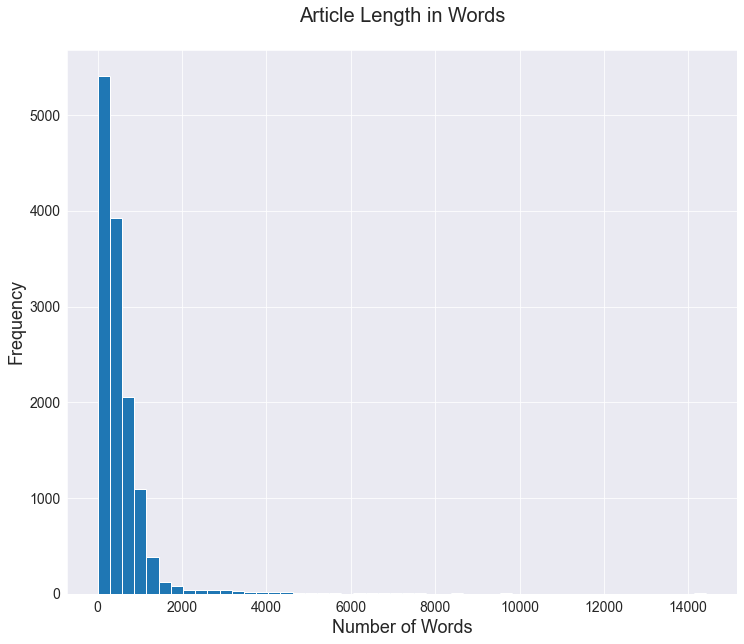

In [69]:
ax=war_df['Words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [70]:
war_df['Unique words'] = war_df['Text Token'].str.split().apply(lambda x: len(set(x)))
war_df['Unique words'].head()

0    325
1    226
2    170
3    202
4    225
Name: Unique words, dtype: int64

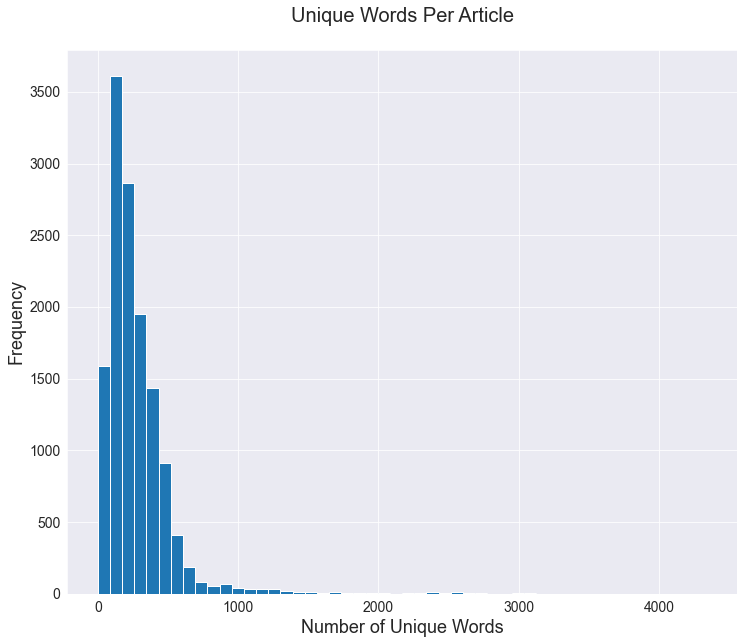

In [71]:
ax=war_df['Unique words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [130]:
from textblob import Word
# war_df_en = war_df[war_df['Lang'] == 'en']
war_df['Text Lemma'] = war_df['Text']\
    .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
war_df['Text Lemma'].head()

0    Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...
1    Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...
2    Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...
3    «Το απαραβίαστο των συνόρων είναι η βάση της σ...
4    Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...
Name: Text Lemma, dtype: object